# CIFAR100

In [1]:
import torchvision.models as models

#resnet18 = models.resnet18()
#alexnet = models.alexnet()
#vgg16 = models.vgg16()
#squeezenet = models.squeezenet1_0()
#densenet = models.densenet161()
#inception = models.inception_v3()
#googlenet = models.googlenet()
#shufflenet = models.shufflenet_v2_x1_0()
#mobilenet = models.mobilenet_v2()
#resnext50_32x4d = models.resnext50_32x4d()
#wide_resnet50_2 = models.wide_resnet50_2()
#mnasnet = models.mnasnet1_0()

In [2]:
model = models.resnet18()

In [3]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
# 모든 모델은 RGB 3채널, 크기는 (224, 224)이며 다음 transform을 이용해 Normalize 되어야 한다. inception_v3의 크기만 (299, 299)이다.
# 모든 모델들은 ImageNet에 기준하여 학습되어 있으며 output은 1000이다.

import torchvision.transforms as transforms

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [5]:
import torch.nn as nn

model.fc = nn.Linear(512, 100) # 마지막 클래스의 갯수로 학습

In [6]:
import os
import random
import numpy as np
import torch
import torchvision

In [7]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [8]:
dataset = torchvision.datasets.CIFAR100('../data', download=True)

Files already downloaded and verified


In [9]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.cifar.CIFAR100'>


In [10]:
print(len(dataset))

50000


In [11]:
n = 200
data, target = dataset[n]

In [12]:
print(type(data))

<class 'PIL.Image.Image'>


In [13]:
print(data.mode, data.width, data.height)

RGB 32 32


In [14]:
print(type(target))

<class 'int'>


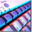

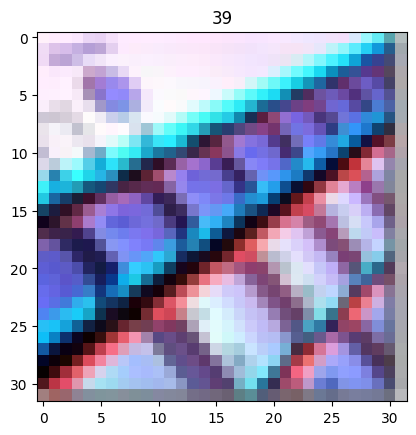

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [16]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.CIFAR100('../data', transform = ToTensor)

In [17]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])


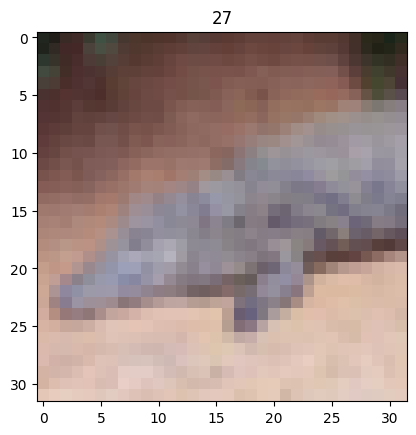

In [18]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [19]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])


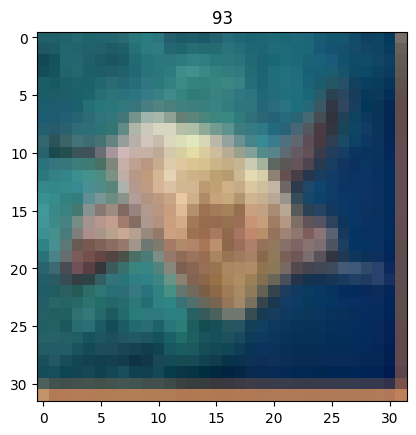

In [20]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [21]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 50000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 50000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 50]
Total number of data: 50000


In [22]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [23]:
import torchvision.transforms as transforms
compose_train = transforms.Compose([
                      transforms.Resize((224, 224)),
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomRotation(10),
                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                      ])
compose_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
])


dataset = torchvision.datasets.CIFAR100(root='../data/', transform=compose_train, download=True)
train_data, test_data = torch.utils.data.random_split(dataset, [40000, 10000])

Files already downloaded and verified


In [24]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 40000
test sets: 10000


In [25]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [26]:
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(512, 100)# 마지막 클래스의 갯수로 학습
model = model.to(device)

/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 224, 224])
tensor([[-5.6836e-01,  2.9630e-01,  8.4330e-03, -7.3012e-01,  7.7313e-02,
         -1.4710e-01, -2.2730e-01, -8.6000e-01,  3.0361e-01, -3.0397e-01,
          7.0039e-01, -1.0533e-02, -6.1930e-01,  6.2701e-01, -5.6856e-01,
         -6.0410e-01,  1.2145e+00,  3.3722e-01, -5.9003e-02, -9.4021e-02,
         -4.0656e-01, -4.8787e-01,  1.4653e-01, -9.3388e-02,  9.1022e-02,
          3.9854e-01, -6.0951e-01, -1.6996e-01, -6.5749e-01,  3.7026e-01,
          4.3642e-01,  5.8368e-01,  2.3259e-01, -1.2845e-01, -8.2198e-01,
          1.0326e+00, -5.8102e-01,  1.2437e-01, -6.0089e-01, -1.0029e+00,
         -1.1162e+00, -1.0985e-02,  3.3926e-01, -5.2198e-01, -7.5891e-01,
         -1.0199e+00, -3.1507e-01, -3.2772e-01, -4.5610e-01, -6.6031e-01,
          4.8735e-01, -1.9485e-01, -1.1766e-01, -8.2950e-01,  1.1188e+00,
          4.7935e-01,  4.2486e-01, -6.2319e-01,  2.0415e-01, -2.4739e-01,
         -1.1166e+00,  1.2484e+00,  2.4901e-01, -3.9944e-01, -6.2558e-01,
        

In [28]:
BATCH_SIZE = 40

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 35 # 35회 학습

list_training_loss = []
list_test_loss = []
batch_length = int(len(train_data) / BATCH_SIZE)

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_target
#        if( n_train % 100 == 0 ):
#          print('epoch {}th: {}/{} loss - {}'.format(epoch, n_train, batch_length, loss.data.cpu().numpy().sum()))


    if (epoch + 1) % 5 != 0:
        print('epoch {}th training loss: {}'.format(
                epoch + 1, train_loss / n_train
            ))
    else:        
        model.eval()
        n_test = 0
        test_loss = 0
        correct = 0
        total = 0
        for test_data, test_target in test_loader:
            test_data = test_data.to(device)
            test_target = test_target.to(device)
            y_pred = model(test_data)
            idx_pred = torch.max(y_pred, 1)[1]
            del test_data
            loss = criterion(y_pred, test_target).sum()
            test_loss += loss.data.cpu().numpy()
            n_test += 1
            total += len(test_target)
            correct += (idx_pred == test_target).sum()

        accuracy = correct * 100 / total
        print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
                epoch + 1, train_loss / n_train, test_loss / n_test,
                accuracy
            ))
        list_training_loss.append(train_loss / n_train)
        list_test_loss.append(test_loss / n_test)

epoch 1th training loss: 2.8655854818820954
epoch 2th training loss: 2.123191576361656
epoch 3th training loss: 1.9898309626579285
epoch 4th training loss: 1.9278635820150376
epoch 5th training loss: 1.8874147047996521 test loss: 1.8980239024162293, accuracy: 49.0099983215332
epoch 6th training loss: 1.8550069346427918
epoch 7th training loss: 1.831704672574997
epoch 8th training loss: 1.8258260287046433
epoch 9th training loss: 1.8092670166492462
epoch 10th training loss: 1.799646049976349 test loss: 1.8502174780368805, accuracy: 50.63999938964844
epoch 11th training loss: 1.787239220380783
epoch 12th training loss: 1.7943567390441895
epoch 13th training loss: 1.7732734495401383
epoch 14th training loss: 1.7780484699606895
epoch 15th training loss: 1.7607176140546799 test loss: 1.83691917181015, accuracy: 51.27000045776367


KeyboardInterrupt: 